In [1]:
!pip install pygame

In [2]:
!pip install midiutil

In [3]:
!pip install pretty_midi

In [4]:
import sonify as sonify
from importlib  import reload
reload(sonify)

ModuleNotFoundError: No module named 'pyaudio'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
import wave

In [ ]:
#!wget https://zenodo.org/record/2539456/files/plasticc_train_metadata.csv.gz
#!wget https://zenodo.org/record/2539456/files/plasticc_train_lightcurves.csv.gz

In [ ]:
#!mkdir data

In [ ]:
#!mv plasticc* data

In [ ]:
ls data

In [ ]:
data = pd.read_csv("data/plasticc_train_lightcurves.csv.gz") #43018203

In [ ]:
objData = data["object_id"].isin([43018203])
obj = data[objData]
time = obj["mjd"]
flux = obj["flux"]


In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(time, flux, 'o', color = "black")


In [ ]:
f, ax = plt.subplots(2,3, figsize=(15,8))
f.subplots_adjust(wspace=0.5)
f.subplots_adjust(hspace=0.5)
ax = ax.flatten()
ugrizyC = ["purple", "blue", "green", "lightgreen", "yellow", "red"]
ugrizy = ["u","g","r","i","z","y"]
for i in range(6):
    objPfilt = obj["passband"].isin([i])
    objP = obj[objPfilt]
    timeP = objP["mjd"]
    fluxP = objP["flux"]
    ax[i].set_xlabel("Time (MJD)")
    ax[i].set_ylabel("Flux")
    ax[i].set_title(ugrizy[i])
    ax[i].scatter(timeP, fluxP, color = ugrizyC[i])
   


In [ ]:
plt.figure(figsize=(10, 3))
ugrizyC = ["purple", "blue", "green", "lightgreen", "yellow", "red"]
for i in range(6):
    objPfilt = obj["passband"].isin([i])
    objP = obj[objPfilt]
    timeP = objP["mjd"]
    fluxP = objP["flux"]
    plt.plot(timeP,fluxP, 'o', color = ugrizyC[i])
plt.title("ugrizy")
plt.xlabel("Time (MJD)")
plt.ylabel("Flux")

In [ ]:
x_points = time
y_points = flux
low_note=20
high_note=100
normalized_x = sonify.core.scale_list_to_range(x_points, new_min=0, new_max=30)
normalized_y = sonify.core.scale_list_to_range(y_points, new_min=low_note, new_max=high_note)
        
normed_data = list(zip(normalized_x[:10], normalized_y[:10]))


# PLAY THIS FIRST

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(time, flux, 'o', color = "black")

In [ ]:
import pygame
import wave

In [ ]:
#sonify.play_midi_from_data(normed_data)


In [ ]:
pwd

In [ ]:
!ls

In [ ]:
############################################### now for multitrack

In [ ]:
ugrizyC = ["purple", "blue", "green", "lightgreen", "yellow", "red"]
def multiPlotObject(data, x0=None, x1=None, y0=None, y1=None):
    plt.figure(figsize=(10, 3))
    plt.xlabel("Time (MJD)")
    plt.ylabel("Flux")
    
    #objData = data["object_id"].isin([objectID])
    obj = data#[objData]
    
    for i in range(6):
        objPfilt = obj["passband"].isin([i])
        objP = obj[objPfilt]
        timeP = objP["mjd"]
        #print(timeP)
        fluxP = objP["flux"]
        plt.plot(timeP,fluxP, 'o', color = ugrizyC[i])

    if not (x0 is None) and not (x1 is None):
        plt.xlim(x0,x1)
    if not (y0 is None) and not (y1 is None):
        plt.ylim(y0,y1)
        
def multiPlotBand(timeP, fluxP, fluxerrP=None, 
                  i=0, x0=None, x1=None, y0=None, y1=None):
    plt.xlabel("Time (MJD)")
    plt.ylabel("Flux")

    if fluxerrP is None:
        plt.plot(timeP, fluxP, 'o', color = ugrizyC[i], label="ugrizy"[i])
    else:
        plt.errorbar(timeP, fluxP, yerr=fluxerrP, fmt='o', color = ugrizyC[i], label="ugrizy"[i])
  
    if not (x0 is None) and not (x1 is None):
        plt.xlim(x0,x1)
    if not (y0 is None) and not (y1 is None):
        plt.ylim(y0,y1)
    plt.legend()

In [1]:
def multiSonification(data, band=None):
    multiData = []

    FEObj = pd.DataFrame()
    
    number_of_octaves = []
    octave_start = []
    volume = []
    for i in range(6):
        if not (band is None) and not i==band:
            continue
        print(i)
        objPfilt = data["passband"].isin([i])
        objP = data[objPfilt]
        timeP = objP["mjd"]
        #print(timeP)
        fluxP = objP["flux"]
        errP = objP["flux_err"] 
        scaled_x = sonify.scale_list_to_range(timeP, new_min=0, new_max=10)
        #print(scaled_x)
        scaled_y = sonify.scale_list_to_range(fluxP, new_min=0, new_max=fluxP.max()/100)
        
        scaled_errP = sonify.scale_list_to_range(errP, new_min=0, new_max=254)
        scaled_errP = 255 - np.array(scaled_errP)
        quantized_x = sonify.quantize_x_value(scaled_x, 0.1)
        qyantized_y = sonify.quantize_x_value(scaled_y, 0.1)
        #print(scaled_y)
        multiData.append(list(zip(quantized_x, scaled_y)))
        #print(multiData)
        volume.append(np.array(scaled_errP).astype(int))
        number_of_octaves.append(int(fluxP.max()/100)+1)
        octave_start.append(6-i)
        multiPlotBand(quantized_x, fluxP, fluxerrP=errP, i=i)
    plt.show()
    instruments_to_add = ['piccolo',
                          'viola',
                          'trumpet',
                          'cello',
                          'slap bass 1','tuba']
    
    multiDataWIntsruments = []
    for index, track in enumerate(multiData):
        multiDataWIntsruments.append([instruments_to_add[index]] + track)
    print("oct", octave_start)
    print("noct", number_of_octaves)
    print("volume", volume)
    print("time", quantized_x)
    print("y", scaled_y)
    #sonify.play_midi_from_data([multiDataWIntsruments[0]], track_type='multiple', key='c_major')
    #track_type='multiple', key='c_major')
    #FEObj = data
    if not (band is None):
        sonify.play_midi_from_data(multiDataWIntsruments[0:1], track_type='multiple', 
                               key='c_minor', #octave_start = octave_start,
                               #number_of_octaves=number_of_octaves, 
                               volume=volume)
    else:
        sonify.play_midi_from_data(multiDataWIntsruments, track_type='multiple', 
                               key='c_minor', octave_start = octave_start,
                               number_of_octaves=number_of_octaves, 
                               volume=volume)
    return(data)


def multimonotoneSonification(data, nbands):
    multiData = []

    FEObj = pd.DataFrame()
    
    number_of_octaves = []
    octave_start = []
    volume = []
    for i in range(6):
        print(i)
        objPfilt = data["passband"].isin([i])
        objP = data[objPfilt]
        timeP = objP["mjd"]
        #print(timeP)
        fluxP = objP["flux"]
        errP = objP["flux_err"] 
        refluxP = np.zeros_like(objP["flux"]) + i * 10 + 1
        scaled_x = sonify.scale_list_to_range(timeP, new_min=0, new_max=10)
        #print(scaled_x)
        quantized_x = sonify.quantize_x_value(scaled_x, 0.05)
        #print(scaled_y)
        multiData.append(list(zip(quantized_x, refluxP)))
        #print(multiData)
        number_of_octaves.append(int(fluxP.max()/100)+1)
        octave_start.append(5-i)
        
        #print(refluxP)
        
        volume.append(sonify.quantize_x_value(
            sonify.scale_list_to_range(fluxP, new_min=1, new_max=255), 1))
        print(volume)
        #volume[-1] = sonify.scale_list_to_range(volume[-1], new_min=0, new_max=np.abs(volume[-1]).max())
        number_of_octaves.append(int(fluxP.max()/3)+1)
        octave_start.append(3-i)
        multiPlotBand(quantized_x, fluxP,  i=i)
    plt.show()
    instruments_to_add = ['piccolo',
                          'viola',
                          "oboe",
                          'cello',
                          'tuba', 
                          'steel drums']
    #instruments_to_add = [inst] * 6
    
    multiDataWIntsruments = []
    for index, track in enumerate(multiData):
        multiDataWIntsruments.append([instruments_to_add[index]] + track)
    #print(octave_start)
    #print(number_of_octaves)
    #print(volume)
    #sonify.play_midi_from_data([multiDataWIntsruments[0]], track_type='multiple', key='c_major')
    #track_type='multiple', key='c_major')
    #FEObj = data
    sonify.play_midi_from_data(multiDataWIntsruments[:nbands], track_type='multiple', 
                                 key='c_minor', octave_start = octave_start,
                               number_of_octaves=number_of_octaves,
                               volume=volume)
    return(data)

# play this next

0
1
2
3
4
5


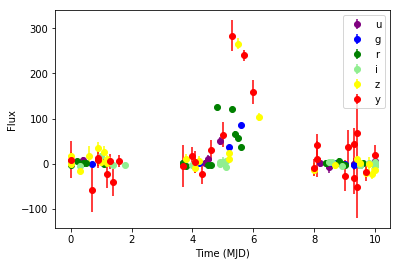

oct [6, 5, 4, 3, 2, 1]
noct [1, 1, 2, 1, 3, 3]
volume [array([196, 205, 203,  86, 174, 255, 165, 130, 122, 245,  70,  95,   1,
       175]), array([113, 255, 238, 182,  75, 174, 224,  99,  99,   1, 123]), array([186, 159, 226, 234, 208, 226, 198, 166, 153,  51, 232,  63,   1,
       188, 215, 166, 184,  76, 206, 255,  82, 172, 231, 247]), array([212, 170,  77, 162, 195, 218, 195, 157, 207, 183,   1, 135, 210,
       255, 199, 161, 162, 193, 183, 178, 198, 149]), array([203, 238, 255,   1, 143, 224, 128, 208, 216, 185, 183, 198, 206,
       221, 198, 160, 222, 129, 196, 227, 215, 166, 119, 166, 183]), array([126,  86, 255, 210, 165, 232, 176, 249,  98, 218, 200, 210, 205,
       186, 156, 252, 191, 227, 198, 129, 154, 138, 152, 153,   1,  19,
       226, 212])]
time [0.0, 0.7, 0.9, 0.9, 1.2, 1.3, 1.4, 1.6, 3.7, 4.0, 4.1, 4.3, 4.6, 5.0, 5.3, 5.7, 6.0, 8.0, 8.1, 8.1, 9.0, 9.1, 9.3, 9.3, 9.4, 9.4, 9.7, 10.0]
y [0.5542883033428995, 0.0, 0.5469369695831031, 0.578156367664106, 0.2911033693960

,object_id,mjd,passband,flux,flux_err,detected_bool
931466,43018203,59716.3981,5,9.031878,40.635723,0
931467,43018203,59722.3836,4,16.759033,9.524618,0
931468,43018203,59724.4273,4,-0.819979,7.313416,0
931469,43018203,59729.2829,3,0.943308,4.089046,0
931470,43018203,59749.2689,4,-15.890773,6.238988,0
931471,43018203,59753.2140,1,0.042423,2.469140,0
931472,43018203,59754.1481,3,-4.008509,5.493313,0
931473,43018203,59776.3377,4,16.887375,22.398090,0
931474,43018203,59777.3194,5,-57.664654,49.258453,0
931475,43018203,59778.0990,2,-3.216466,3.057677,0


In [61]:
multiSonification(obj)

u
0


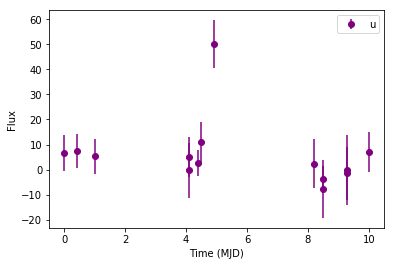

oct [6]
noct [1]
volume [array([196, 205, 203,  86, 174, 255, 165, 130, 122, 245,  70,  95,   1,
       175])]
time [0.0, 0.4, 1.0, 4.1, 4.1, 4.4, 4.5, 4.9, 8.2, 8.5, 8.5, 9.3, 9.3, 10.0]
y [0.12489595303827983, 0.1322222253862713, 0.11379480093588412, 0.0647207322221011, 0.11116896962447206, 0.09035019446582614, 0.16148091725782582, 0.50136681, 0.0881629755348695, 0.033226104023158065, 0.0, 0.05407394688209153, 0.06607070962848642, 0.1277040158048596]
Done playing!


,object_id,mjd,passband,flux,flux_err,detected_bool
931466,43018203,59716.3981,5,9.031878,40.635723,0
931467,43018203,59722.3836,4,16.759033,9.524618,0
931468,43018203,59724.4273,4,-0.819979,7.313416,0
931469,43018203,59729.2829,3,0.943308,4.089046,0
931470,43018203,59749.2689,4,-15.890773,6.238988,0
931471,43018203,59753.2140,1,0.042423,2.469140,0
931472,43018203,59754.1481,3,-4.008509,5.493313,0
931473,43018203,59776.3377,4,16.887375,22.398090,0
931474,43018203,59777.3194,5,-57.664654,49.258453,0
931475,43018203,59778.0990,2,-3.216466,3.057677,0


In [62]:
i=0
print("ugrizy"[i])
multiSonification(obj, i)\

g
1


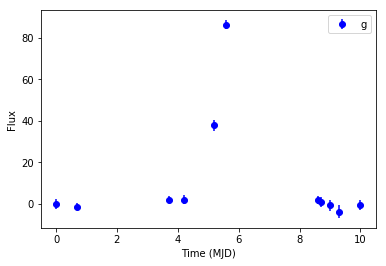

oct [5]
noct [1]
volume [array([113, 255, 238, 182,  75, 174, 224,  99,  99,   1, 123])]
time [0.0, 0.7, 3.7, 4.2, 5.2, 5.6, 8.6, 8.7, 9.0, 9.3, 10.0]
y [0.03596583761687734, 0.020829650271088775, 0.054769030823162604, 0.055086960021289995, 0.3984745982844144, 0.8631291999999999, 0.054088386779437954, 0.044326975707139865, 0.0286425261276494, 0.0, 0.02997884700764602]
Done playing!


,object_id,mjd,passband,flux,flux_err,detected_bool
931466,43018203,59716.3981,5,9.031878,40.635723,0
931467,43018203,59722.3836,4,16.759033,9.524618,0
931468,43018203,59724.4273,4,-0.819979,7.313416,0
931469,43018203,59729.2829,3,0.943308,4.089046,0
931470,43018203,59749.2689,4,-15.890773,6.238988,0
931471,43018203,59753.2140,1,0.042423,2.469140,0
931472,43018203,59754.1481,3,-4.008509,5.493313,0
931473,43018203,59776.3377,4,16.887375,22.398090,0
931474,43018203,59777.3194,5,-57.664654,49.258453,0
931475,43018203,59778.0990,2,-3.216466,3.057677,0


In [54]:
i=1
print("ugrizy"[i])
multiSonification(obj, i)

# play this next

r
2


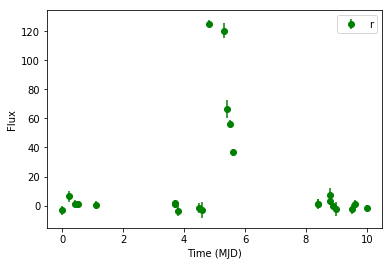

oct [4]
noct [2]
volume [array([186, 159, 226, 234, 208, 226, 198, 166, 153,  51, 232,  63,   1,
       188, 215, 166, 184,  76, 206, 255,  82, 172, 231, 247])]
time [0.0, 0.2, 0.4, 0.5, 1.1, 3.7, 3.7, 3.8, 4.5, 4.6, 4.8, 5.3, 5.4, 5.5, 5.6, 8.4, 8.4, 8.8, 8.8, 8.9, 9.0, 9.5, 9.6, 10.0]
y [0.005785447329537925, 0.09771984207480953, 0.04822701293810117, 0.04461642052088592, 0.038649658452337796, 0.0517744271210416, 0.04547250015250653, 0.0, 0.021723044914367464, 0.006210255447650294, 1.2533988999999999, 1.2059700581644996, 0.6819339238609621, 0.582776461550469, 0.39323095728596624, 0.04948692861959023, 0.0490757169233241, 0.10722568190490915, 0.06462236642988534, 0.03530503572614185, 0.0121192157399556, 0.01567080298598945, 0.05000517453180367, 0.02008024584165808]
Done playing!


,object_id,mjd,passband,flux,flux_err,detected_bool
931466,43018203,59716.3981,5,9.031878,40.635723,0
931467,43018203,59722.3836,4,16.759033,9.524618,0
931468,43018203,59724.4273,4,-0.819979,7.313416,0
931469,43018203,59729.2829,3,0.943308,4.089046,0
931470,43018203,59749.2689,4,-15.890773,6.238988,0
931471,43018203,59753.2140,1,0.042423,2.469140,0
931472,43018203,59754.1481,3,-4.008509,5.493313,0
931473,43018203,59776.3377,4,16.887375,22.398090,0
931474,43018203,59777.3194,5,-57.664654,49.258453,0
931475,43018203,59778.0990,2,-3.216466,3.057677,0


In [55]:
i=2
print("ugrizy"[i])
multiSonification(obj, i)

i
3


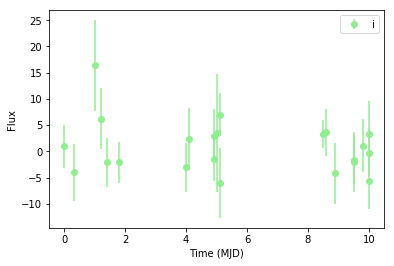

oct [3]
noct [1]
volume [array([212, 170,  77, 162, 195, 218, 195, 157, 207, 183,   1, 135, 210,
       255, 199, 161, 162, 193, 183, 178, 198, 149])]
time [0.0, 0.3, 1.0, 1.2, 1.4, 1.8, 4.0, 4.1, 4.9, 4.9, 5.0, 5.1, 5.1, 8.5, 8.6, 8.9, 9.5, 9.5, 9.8, 10.0, 10.0, 10.0]
y [0.05090471342207709, 0.014703177313569425, 0.16364618, 0.08964247578897742, 0.02849668431088008, 0.028847907750220617, 0.02176063224080524, 0.061340038320095554, 0.03372278703008453, 0.06605331329275697, 0.06919868653530374, 0.0, 0.09506010574817696, 0.06863319939836128, 0.07041370528399529, 0.013243686814918512, 0.029007677057146804, 0.032391432188178165, 0.05167979268221289, 0.0024065992070012292, 0.04116633771266884, 0.06873777248183671]
Done playing!


,object_id,mjd,passband,flux,flux_err,detected_bool
931466,43018203,59716.3981,5,9.031878,40.635723,0
931467,43018203,59722.3836,4,16.759033,9.524618,0
931468,43018203,59724.4273,4,-0.819979,7.313416,0
931469,43018203,59729.2829,3,0.943308,4.089046,0
931470,43018203,59749.2689,4,-15.890773,6.238988,0
931471,43018203,59753.2140,1,0.042423,2.469140,0
931472,43018203,59754.1481,3,-4.008509,5.493313,0
931473,43018203,59776.3377,4,16.887375,22.398090,0
931474,43018203,59777.3194,5,-57.664654,49.258453,0
931475,43018203,59778.0990,2,-3.216466,3.057677,0


In [44]:
i=3
print("ugrizy"[i])
multiSonification(obj, i)

z
4


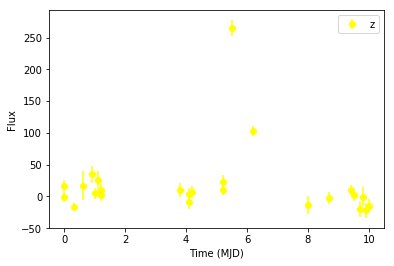

oct [2]
noct [3]
volume [array([203, 238, 255,   1, 143, 224, 128, 208, 216, 185, 183, 198, 206,
       221, 198, 160, 222, 129, 196, 227, 215, 166, 119, 166, 183])]
time [0.0, 0.0, 0.3, 0.6, 0.9, 1.0, 1.1, 1.2, 1.2, 3.8, 4.1, 4.1, 4.2, 5.2, 5.2, 5.5, 6.2, 8.0, 8.7, 9.4, 9.5, 9.7, 9.8, 9.9, 10.0]
y [0.35742465432147663, 0.19506883160459765, 0.05587834929156415, 0.3586099923256335, 0.5260122801655691, 0.24572736948739965, 0.44166482585467004, 0.29871370166907263, 0.2213655896762635, 0.29558691112518737, 0.11944668301847398, 0.23868054604326086, 0.26981283334266504, 0.2981524158349215, 0.41909109233862646, 2.65160553, 1.1563880107362294, 0.08007087426590348, 0.1795593402068279, 0.2917364051490529, 0.21825023302345947, 0.02003152143418258, 0.20041102628534466, 0.0, 0.07034400401413941]
Done playing!


,object_id,mjd,passband,flux,flux_err,detected_bool
931466,43018203,59716.3981,5,9.031878,40.635723,0
931467,43018203,59722.3836,4,16.759033,9.524618,0
931468,43018203,59724.4273,4,-0.819979,7.313416,0
931469,43018203,59729.2829,3,0.943308,4.089046,0
931470,43018203,59749.2689,4,-15.890773,6.238988,0
931471,43018203,59753.2140,1,0.042423,2.469140,0
931472,43018203,59754.1481,3,-4.008509,5.493313,0
931473,43018203,59776.3377,4,16.887375,22.398090,0
931474,43018203,59777.3194,5,-57.664654,49.258453,0
931475,43018203,59778.0990,2,-3.216466,3.057677,0


In [43]:
i=4
print("ugrizy"[i])
multiSonification(obj, i)

# play this next

y
5


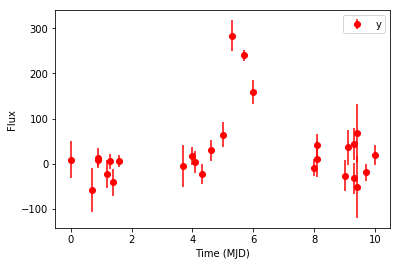

oct [1]
noct [3]
volume [array([126,  86, 255, 210, 165, 232, 176, 249,  98, 218, 200, 210, 205,
       186, 156, 252, 191, 227, 198, 129, 154, 138, 152, 153,   1,  19,
       226, 212])]
time [0.0, 0.7, 0.9, 0.9, 1.2, 1.3, 1.4, 1.6, 3.7, 4.0, 4.1, 4.3, 4.6, 5.0, 5.3, 5.7, 6.0, 8.0, 8.1, 8.1, 9.0, 9.1, 9.3, 9.3, 9.4, 9.4, 9.7, 10.0]
y [0.5542883033428995, 0.0, 0.5469369695831031, 0.578156367664106, 0.2911033693960749, 0.5246076630056088, 0.140708000165625, 0.5308452431858217, 0.4421475888438568, 0.6254968867401323, 0.5102071190953775, 0.2854767015370414, 0.7240161928470393, 1.0166520454826438, 2.83667816, 2.472163249564554, 1.7998774848592, 0.4099278436522517, 0.8280050299585536, 0.5752400030516642, 0.2629605726363243, 0.7803615395918062, 0.8465848091847243, 0.2111517505900588, 0.050529172238204544, 1.0391295716390827, 0.3231781943175572, 0.6351304779022179]
Done playing!


,object_id,mjd,passband,flux,flux_err,detected_bool
931466,43018203,59716.3981,5,9.031878,40.635723,0
931467,43018203,59722.3836,4,16.759033,9.524618,0
931468,43018203,59724.4273,4,-0.819979,7.313416,0
931469,43018203,59729.2829,3,0.943308,4.089046,0
931470,43018203,59749.2689,4,-15.890773,6.238988,0
931471,43018203,59753.2140,1,0.042423,2.469140,0
931472,43018203,59754.1481,3,-4.008509,5.493313,0
931473,43018203,59776.3377,4,16.887375,22.398090,0
931474,43018203,59777.3194,5,-57.664654,49.258453,0
931475,43018203,59778.0990,2,-3.216466,3.057677,0


In [45]:
i=5

print("ugrizy"[i])
multiSonification(obj, i)

# play this next

In [2]:
multimonotoneSonification(obj,  6)

NameError: name 'obj' is not defined